## Clustering Assignment

Question 1: What is the difference between K-Means and Hierarchical Clustering?
Provide a use case for each.

Ans. K-Means Clustering

How it works:

Starts with

k predefined clusters.

Assigns each point to the nearest cluster center (centroid).

Updates centroids based on the mean of points in each cluster.

Iterates until centroids stabilize.

Key features:

Requires the number of clusters

k in advance.

Works well for large datasets.

Fast and efficient but sensitive to initial centroid selection and outliers.

Produces spherical (round) clusters.

Use case:

Customer segmentation in marketing - divide customers into groups (e.g., “budget-conscious,” “luxury spenders,” “occasional buyers”) based on purchasing behavior.

- Hierarchical Clustering

How it works:

Builds a hierarchy of clusters.

Two types:

Agglomerative (bottom-up): starts with each point as its own cluster and merges clusters step by step.

Divisive (top-down): starts with one big cluster and splits recursively.

Represented using a dendrogram, where you can “cut” at a certain level to decide the number of clusters.

Key features:

No need to predefine the number of clusters.

Produces a tree-like structure of relationships.

Computationally expensive for very large datasets.

Use case:

Document clustering in research - group research papers based on similarity of content to explore topic hierarchies (e.g., “AI → Machine Learning → Deep Learning”).

- Summary:

K-Means = fast, efficient, requires

k, good for large data.

Hierarchical = interpretable, no need for

k, but slower, better for smaller data with natural hierarchy.

Question 2: Explain the purpose of the Silhouette Score in evaluating clustering
algorithms.

Ans.Silhouette Score - Purpose

The Silhouette Score is a metric used to evaluate how well data points have been clustered.
It measures both cohesion and separation:

Cohesion - how close a point is to other points in its own cluster.

Separation  how far a point is from points in the nearest neighboring cluster.

Formula (for a single point )
s(i)={b(i)-a(i)}/max(a(i),b(i))

	​


Where:
a(i) = average distance from point

i to all other points in the same cluster (intra-cluster distance).


b(i) = average distance from point

i to points in the nearest other cluster (inter-cluster distance).

Score Range

+1 → Point is well clustered (close to its own cluster, far from others).

0 → Point is on or very near the boundary between two clusters.

-1 → Point may be in the wrong cluster (closer to another cluster than its own).

Purpose in Evaluation

Helps determine the quality of clustering without labels (unsupervised).

Can be used to choose the optimal number of clusters by comparing average silhouette scores for different
k values.

Works for both K-Means and Hierarchical Clustering (and others).

Example Use Case

In customer segmentation, you can compute the average silhouette score for different cluster numbers (e.g., k=2,3,4,5) and pick the value of
k with the highest score → ensures meaningful and well-separated customer groups.


Question 3: What are the core parameters of DBSCAN, and how do they influence the
clustering process?

Ans.Core Parameters of DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) groups points based on density rather than distance to centroids. It relies on two key parameters:

1. ε (Epsilon / eps)

Definition: The maximum distance between two points for them to be considered neighbors.

Effect:

Small ε → many small clusters, more points labeled as noise.

Large ε → fewer, larger clusters (risk of merging distinct clusters).

2. MinPts (Minimum Points)

Definition: The minimum number of points required within a point’s ε-neighborhood to consider it a core point.

Effect:

Small MinPts (e.g., 2 or 3) → even sparse regions form clusters (risk of noise becoming clusters).

Large MinPts → only dense regions form clusters (sparser points treated as noise).

Rule of thumb:

MinPts ≥ dimension of data + 1.

Example: For 2D data, MinPts ≥ 3.

How They Influence Clustering

Core Point: Has ≥ MinPts neighbors within ε.

Border Point: Has fewer than MinPts neighbors, but lies within ε of a core point.

Noise Point: Not within ε of any core point (outlier).

Thus:

ε controls the “reach” of neighborhoods.

MinPts controls how dense a region must be to form a cluster.


Question 4: Why is feature scaling important when applying clustering algorithms like K-Means and DBSCAN?

Ans.Why Feature Scaling Matters in Clustering

Clustering algorithms like K-Means and DBSCAN rely on distance metrics (usually Euclidean distance) to group points.
If features are on very different scales, the clustering can be distorted.

1. In K-Means

K-Means assigns points to the nearest centroid by computing Euclidean distances.

If one feature has a much larger numerical range than others, it dominates the distance calculation.

Example:

Feature 1: Age (20-70)

Feature 2: Income (20,000-200,000)

Without scaling → Income outweighs Age completely in distance computation.

Effect: Clusters are biased towards the higher-scale feature.

2. In DBSCAN

DBSCAN groups points if they lie within an ε distance of each other.

If one feature is much larger in scale, ε becomes misleading:

Small features get ignored.

Clusters may not form correctly or too many points get labeled as noise.

3. General Benefits of Scaling

Ensures all features contribute equally.

Improves cluster shape (prevents skewed clusters).

Makes ε (in DBSCAN) and distance comparisons (in K-Means) meaningful


Question 5: What is the Elbow Method in K-Means clustering and how does it help
determine the optimal number of clusters?

Ans.  Elbow Method in K-Means Clustering
What it is

The Elbow Method is a heuristic used to determine the optimal number of clusters (k) in K-Means.
It looks at how the within-cluster variance (WCSS) decreases as k increases.

Steps in the Elbow Method

Run K-Means with different values of k (e.g., 1 to 10).

Compute WCSS for each k.

Plot k (x-axis) vs. WCSS (y-axis).

Look for the “elbow point” in the curve — where WCSS stops decreasing significantly.

Why it works

As k increases → WCSS always decreases (clusters get smaller, tighter).

But after a certain k → improvement becomes marginal.

That turning point (like an elbow in your arm) is considered the best trade-off between:

Compactness (low WCSS)

Simplicity (fewer clusters)

Example Use Case

In customer segmentation, using the Elbow Method might show that after k=4, WCSS reduction is minimal → suggesting 4 customer groups is optimal.

- Summary:
The Elbow Method helps pick the optimal number of clusters in K-Means by finding the point where adding more clusters no longer gives substantial improvement in cluster compactness.

Question 6: Generate synthetic data using make_blobs(n_samples=300, centers=4),
apply KMeans clustering, and visualize the results with cluster centers.




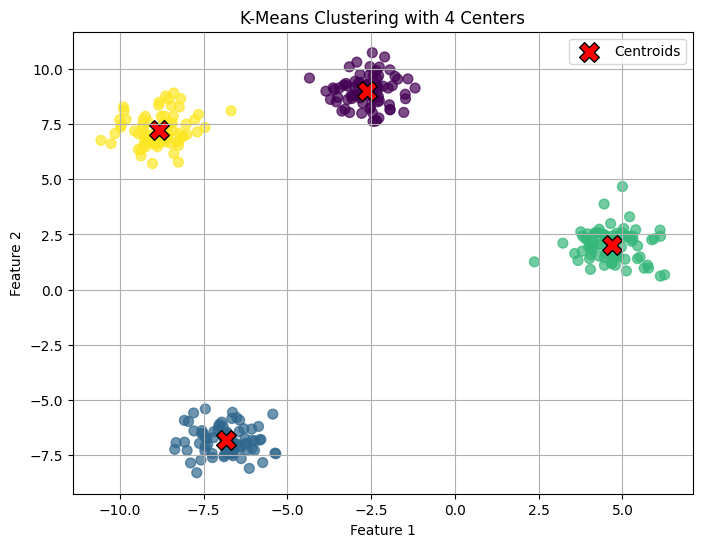

In [2]:
# Question 6: Generate synthetic data, apply KMeans, and visualize

import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans

# 1. Generate synthetic dataset
X, y_true = make_blobs(n_samples=300, centers=4, cluster_std=0.7, random_state=42)

# 2. Apply KMeans clustering
kmeans = KMeans(n_clusters=4, random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X)

# 3. Get cluster centers
centers = kmeans.cluster_centers_

# 4. Visualize results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis', alpha=0.7)
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, marker='X', edgecolor='black', label='Centroids')
plt.title("K-Means Clustering with 4 Centers")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.show()


Question 7: Load the Wine dataset, apply StandardScaler , and then train a DBSCAN
model. Print the number of clusters found (excluding noise).

In [3]:
# Question 7: Wine dataset + StandardScaler + DBSCAN

from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
import numpy as np

# 1. Load dataset
data = load_wine()
X = data.data

# 2. Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Train DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)  # you can tune eps & min_samples
labels = dbscan.fit_predict(X_scaled)

# 4. Count clusters (excluding noise label = -1)
unique_labels = set(labels)
n_clusters = len(unique_labels) - (1 if -1 in unique_labels else 0)

print("Cluster labels:", np.unique(labels))
print("Number of clusters found (excluding noise):", n_clusters)
print("Number of noise points:", list(labels).count(-1))


Cluster labels: [-1]
Number of clusters found (excluding noise): 0
Number of noise points: 178


Question 8: Generate moon-shaped synthetic data using
make_moons(n_samples=200, noise=0.1), apply DBSCAN, and highlight the outliers in
the plot.

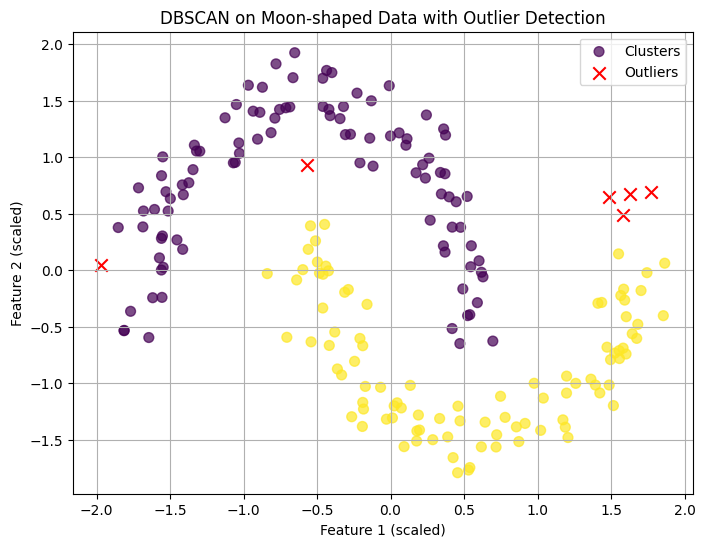

In [4]:
# Question 8: Moon-shaped data + DBSCAN with outlier highlighting

import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler

# 1. Generate moon-shaped synthetic data
X, y = make_moons(n_samples=200, noise=0.1, random_state=42)

# 2. Scale features (important for DBSCAN)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# 4. Plot results
plt.figure(figsize=(8, 6))

# Normal points (clustered)
plt.scatter(
    X_scaled[labels != -1, 0],
    X_scaled[labels != -1, 1],
    c=labels[labels != -1],
    cmap="viridis",
    s=50,
    alpha=0.7,
    label="Clusters"
)

# Outliers (label = -1)
plt.scatter(
    X_scaled[labels == -1, 0],
    X_scaled[labels == -1, 1],
    c="red",
    s=80,
    marker="x",
    label="Outliers"
)

plt.title("DBSCAN on Moon-shaped Data with Outlier Detection")
plt.xlabel("Feature 1 (scaled)")
plt.ylabel("Feature 2 (scaled)")
plt.legend()
plt.grid(True)
plt.show()


Question 9: Load the Wine dataset, reduce it to 2D using PCA, then apply
Agglomerative Clustering and visualize the result in 2D with a scatter plot.

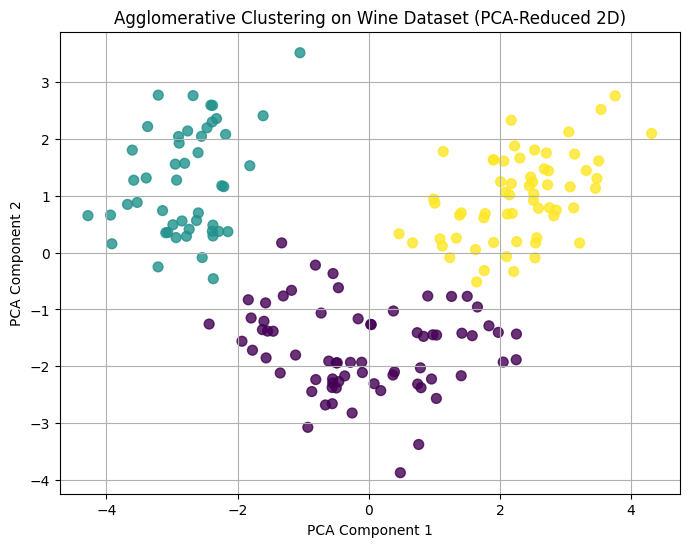

In [5]:
# Question 9: Wine dataset + PCA (2D) + Agglomerative Clustering + Visualization

import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering

# 1. Load Wine dataset
data = load_wine()
X = data.data

# 2. Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Reduce to 2D using PCA
pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X_scaled)

# 4. Apply Agglomerative Clustering
agg = AgglomerativeClustering(n_clusters=3, linkage="ward")
labels = agg.fit_predict(X_pca)

# 5. Visualize in 2D
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap="viridis", s=50, alpha=0.8)
plt.title("Agglomerative Clustering on Wine Dataset (PCA-Reduced 2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.grid(True)
plt.show()


Question 10: You are working as a data analyst at an e-commerce company. The
marketing team wants to segment customers based on their purchasing behavior to run
targeted promotions. The dataset contains customer demographics and their product
purchase history across categories.
Describe your real-world data science workflow using clustering:
● Which clustering algorithm(s) would you use and why?
● How would you preprocess the data (missing values, scaling)?
● How would you determine the number of clusters?
● How would the marketing team benefit from your clustering analysis?


Ans.1. Choice of Clustering Algorithm(s)

K-Means → Fast, scalable, and works well for large datasets (millions of customers). Good for partitioning customers into clear segments (e.g., “bargain shoppers,” “loyal premium buyers”).

DBSCAN → Useful for detecting outliers (rare shopping patterns, fraud detection).

Hierarchical Clustering → Good in the exploratory phase to understand relationships and possible natural groupings.

- Likely workflow: Start with K-Means for main segmentation, then use DBSCAN to detect anomalies.

2. Data Preprocessing
(a) Handle Missing Values

Demographics (age, income, etc.): Impute missing values (mean/median for numeric, mode/frequent for categorical).

Purchase history: Fill missing categories with 0 (indicating no purchase).

(b) Feature Engineering

Aggregate purchases into features:

RFM metrics (Recency, Frequency, Monetary value).

Category-level spending (e.g., electronics, fashion, groceries).

Engagement features (visits, time spent, returns).

(c) Scaling

Apply StandardScaler (z-score) or MinMaxScaler to ensure all features contribute fairly (so that high-value features like “total spending” don’t dominate clustering).

(d) Encoding

Convert categorical demographics (e.g., gender, region) using One-Hot Encoding.

3. Determining Number of Clusters

For K-Means:

Use Elbow Method (plot WCSS vs. k).

Use Silhouette Score for cluster quality.

For Hierarchical:

Use dendrogram to decide cutoff.

For DBSCAN:

Tune eps and min_samples based on domain knowledge (e.g., what density defines a meaningful segment).

4. Business Value for Marketing Team

Targeted Promotions

Different clusters = different customer personas.

Example:

Cluster 1: High spenders → Luxury promotions.

Cluster 2: Bargain hunters → Discount coupons.

Cluster 3: Infrequent buyers → Retention campaigns.

Personalized Campaigns

Improve customer engagement and conversion rates.

Resource Allocation

Focus marketing budget on high-value or at-risk segments.

Product Strategy

Identify which categories drive spending for different groups.

- Summary:
I would use K-Means (for main segmentation) + DBSCAN (for outlier detection). Preprocessing involves handling missing values, scaling, and encoding categorical data. The number of clusters is chosen using the Elbow Method + Silhouette Score. The marketing team benefits by running personalized promotions, improving ROI, and building data-driven strategies.